# 宅配便（宅急便）銘柄

In [53]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [54]:
name_source = "宅配便（宅急便）銘柄.xlsx"
df_code = pd.read_excel(name_source)
df_code

,コード,銘柄名,市場
0,2384,ＳＢＳＨＤ,東Ｐ
1,3004,神栄,東Ｓ
2,3434,アルファＣｏ,東Ｓ
3,5900,ダイケン,東Ｓ
4,6178,日本郵政,東Ｐ
5,6549,ＤＭソリュ,東Ｓ
6,9064,ヤマトＨＤ,東Ｐ
7,9075,福山運,東Ｐ
8,9076,セイノーＨＤ,東Ｐ
9,9090,ＡＺ丸和ＨＤ,東Ｐ


In [55]:
df_result = pd.DataFrame()
for code in df_code["コード"]:
    print(code)
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    ser = ticker.history(period="1y")["Close"]
    df_result[code] = ser / ser.iloc[0]
df_result

2384
3004
3434
5900
6178
6549
9064
9075
9076
9090
9143
9325


,2384,3004,3434,5900,6178,6549,9064,9075,9076,9090,9143,9325
Date,,,,,,,,,,,,
2024-06-05 00:00:00+09:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-06-06 00:00:00+09:00,1.040535,0.983624,0.995662,1.000000,1.004031,1.016484,0.991540,0.998686,0.990803,1.010025,0.999347,1.011673
2024-06-07 00:00:00+09:00,1.045258,1.013207,0.997831,1.007273,1.000336,1.017268,0.986746,0.976347,0.988625,0.983292,0.970271,1.023346
2024-06-10 00:00:00+09:00,1.056671,1.011093,1.004338,1.012121,1.005375,1.007064,0.983644,0.989487,1.002662,1.002506,0.975171,1.023346
2024-06-11 00:00:00+09:00,1.055884,1.010565,1.002169,1.019394,1.012765,1.007064,0.967851,0.997372,0.993224,0.989975,0.952630,1.004864
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 00:00:00+09:00,1.099038,0.983487,0.773460,0.952663,0.983054,1.220565,1.158566,0.874015,1.094254,0.911764,0.949253,1.109974
2025-06-02 00:00:00+09:00,1.112011,0.991288,0.770447,0.951447,0.971942,1.224490,1.144684,0.856615,1.091477,0.908333,0.958709,1.096963
2025-06-03 00:00:00+09:00,1.112417,0.991846,0.768188,0.950230,0.968469,1.220565,1.155096,0.861969,1.092235,0.916053,0.975931,1.100966


### 日付文字列

In [56]:
dt_start = df_result.index[0]
date_str = f"{dt_start.year:04}-{dt_start.month:02}-{dt_start.day:02}"
row_last = len(df_result) - 1
dt_end = df_result.index[row_last]
date_latest_str = f"{dt_end.year:04}{dt_end.month:02}{dt_end.day:02}"
date_latest_str

'20250605'

In [57]:
df_top = df_result.iloc[row_last].sort_values(ascending=False)
n = 5
df_top.head(n)

6549    1.244898
9325    1.152011
9064    1.150468
2384    1.135524
9076    1.117982
Name: 2025-06-05 00:00:00+09:00, dtype: float64

In [58]:
list_top = list(df_top.index)
len(list_top)

12

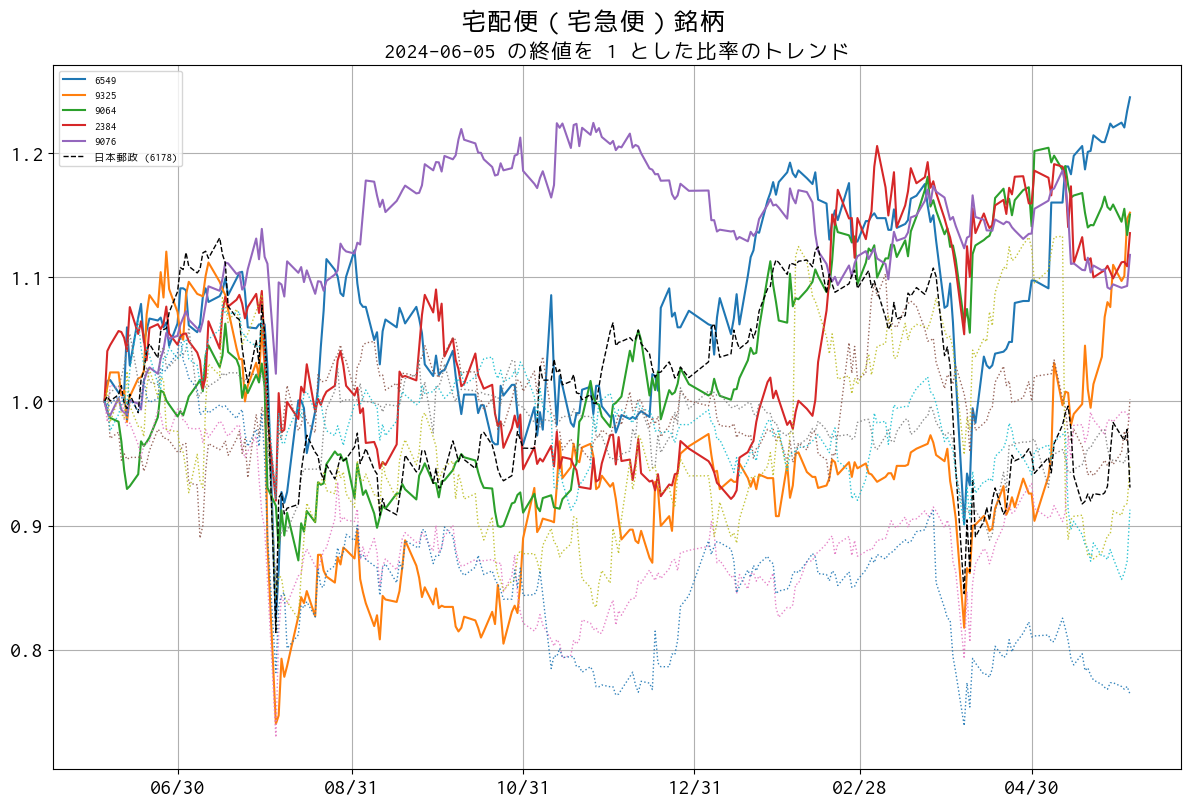

In [59]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91, left=0.05, bottom=0.03, right=0.99)

for i, colname in enumerate(list_top):
    if i < n:
        width = 1.5
        lstyle = "solid"
        ax.plot(df_result[colname], lw=width, ls=lstyle, label=colname)
    elif colname == 6178:
        width = 1
        lstyle = "dashed"
        ax.plot(df_result[colname], lw=width, ls=lstyle, color="black", label=f"日本郵政 ({colname})")        
    else:
        width = 1
        lstyle = "dotted"
        ax.plot(df_result[colname], lw=width, ls=lstyle, alpha=0.9)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
fig.suptitle("宅配便（宅急便）銘柄")
ax.set_title(f"{date_str} の終値を 1 とした比率のトレンド", fontsize=16)
ax.grid()
ax.legend(loc='upper left', fontsize=8)
#plt.tight_layout()

plt.savefig(f"screenshots/{date_latest_str}_report_home_delivery.png")
plt.show()

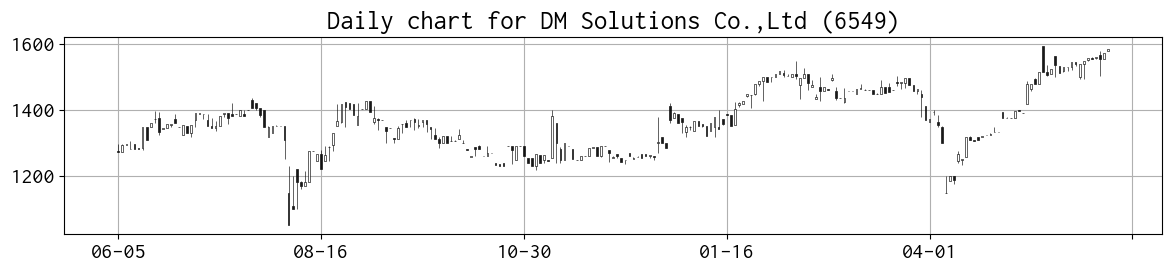

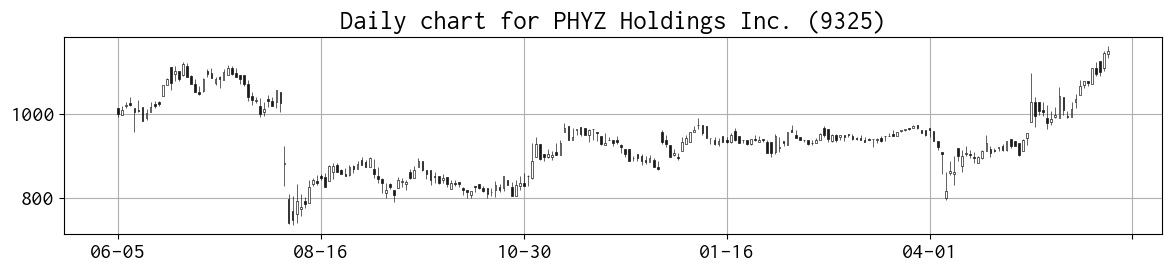

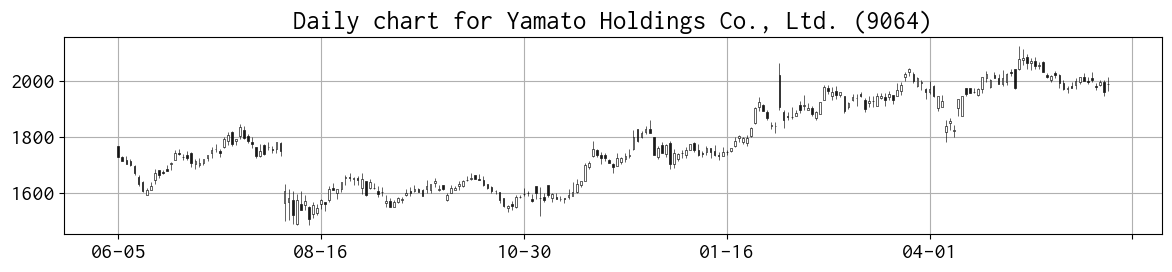

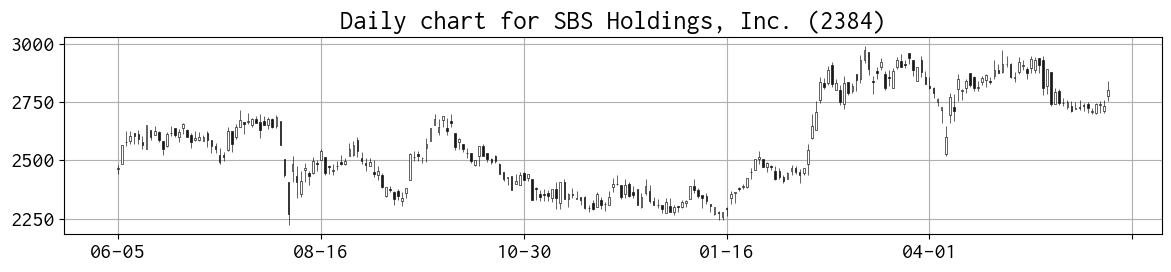

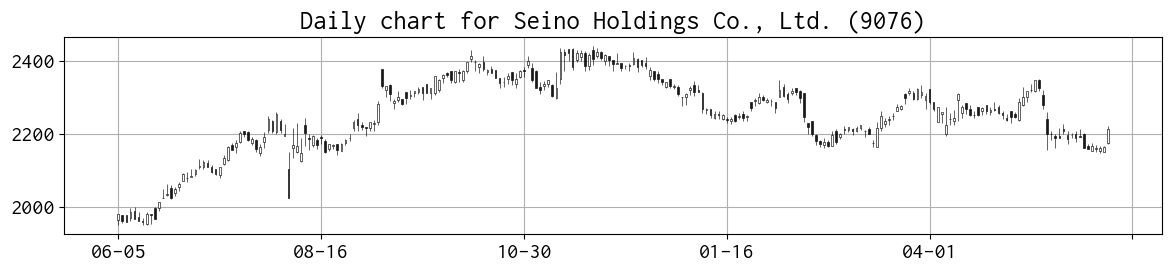

In [60]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

for code in list_top[0:n]:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="1y")
    fig, ax = plt.subplots(figsize=(12, 3))
    mpf.plot(
        df,
        type='candle',
        style='default',
        volume=False,
        datetime_format='%m-%d',
        xrotation=0,
        ax=ax
    )
    ax.set_ylabel(None)
    ax.grid()
    ax.set_title(f"Daily chart for {ticker.info['longName']} ({code})")
    plt.tight_layout()
    plt.savefig(f"screenshots/{date_latest_str}_daily_chart_{code}.png")
    plt.show()